In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 22.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 20.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 59.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 6.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [23]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

In [24]:
track = ['covid19'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [14]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"     

In [15]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:05:11 +0000 2021'
'Thu Nov 04 19:05:11 +0000 2021'
'Thu Nov 04 19:05:10 +0000 2021'
'Thu Nov 04 19:05:09 +0000 2021'
'Thu Nov 04 19:05:09 +0000 2021'
'Thu Nov 04 19:05:09 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:08 +0000 2021'
'Thu Nov 04 19:05:07 +0000 2021'
'Thu Nov 04 19:05:06 +0000 2021'
'Thu Nov 04 19:05:06 +0000 2021'
'Thu Nov 04 19:05:05 +0000 2021'
'Thu Nov 04 19:05:05 +0000 2021'
'Thu Nov 04 19:05:04 +0000 2021'
'Thu Nov 04 19:05:04 +0000 2021'
'Thu Nov 04 19:05:04 +0000 2021'
'Thu Nov 04 19:05:03 +0000 2021'
'Thu Nov 04 19:05:03 +0000 2021'
'Thu Nov 04 19:05:03 +0000 2021'
'Thu Nov 04 19:05:02 +0000 2021'
'Thu Nov 04 19:05:02 +0000 2021'
'Thu Nov 04 19:05:01 +0000 2021'
'Thu Nov 04 19:05:01 +0000 2021'
'Thu Nov 04 19:05:00 +0000 2021'
'Thu Nov 04 19:05:00 +0000 2021'
'Thu Nov 04 19:05:00 +0000 2021'
'Thu Nov 04 19:05:00 +0000 2021'
'Thu Nov 04 19:05:00 +0000 2021'
'Thu Nov 0

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass



'Thu Nov 04 19:04:22 +0000 2021'
'Thu Nov 04 19:04:00 +0000 2021'
'Thu Nov 04 19:04:00 +0000 2021'
'Thu Nov 04 19:04:00 +0000 2021'
'Thu Nov 04 19:04:00 +0000 2021'
'Thu Nov 04 19:03:58 +0000 2021'
'Thu Nov 04 19:03:58 +0000 2021'
'Thu Nov 04 19:03:58 +0000 2021'
'Thu Nov 04 19:03:57 +0000 2021'
'Thu Nov 04 19:03:57 +0000 2021'
'Thu Nov 04 19:03:57 +0000 2021'
'Thu Nov 04 19:03:56 +0000 2021'
'Thu Nov 04 19:03:56 +0000 2021'
'Thu Nov 04 19:03:54 +0000 2021'
'Thu Nov 04 19:03:53 +0000 2021'
'Thu Nov 04 19:03:53 +0000 2021'
'Thu Nov 04 19:03:51 +0000 2021'
'Thu Nov 04 19:03:51 +0000 2021'
'Thu Nov 04 19:03:50 +0000 2021'
'Thu Nov 04 19:03:50 +0000 2021'
'Thu Nov 04 19:03:50 +0000 2021'
'Thu Nov 04 19:03:48 +0000 2021'
'Thu Nov 04 19:03:48 +0000 2021'
'Thu Nov 04 19:03:47 +0000 2021'
'Thu Nov 04 19:03:46 +0000 2021'
'Thu Nov 04 19:03:45 +0000 2021'
'Thu Nov 04 19:03:45 +0000 2021'
'Thu Nov 04 19:03:44 +0000 2021'
'Thu Nov 04 19:03:43 +0000 2021'
'Thu Nov 04 19:03:42 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 04 19:01:30 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:28 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:27 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:26 +0000 2021'
'Thu Nov 04 19:01:25 +0000 2021'
'Thu Nov 04 19:01:24 +0000 2021'
'Thu Nov 04 19:01:24 +0000 2021'
'Thu Nov 04 19:01:24 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:22 +0000 2021'
'Thu Nov 04 19:01:21 +0000 2021'
'Thu Nov 04 19:01:21 +0000 2021'
'Thu Nov 04 19:01:21 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:19 +0000 2021'
'Thu Nov 04 19:01:19 +0000 2021'
'Thu Nov 04 19:01:19 +0000 2021'
'Thu Nov 04 19:01:18 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:59:21 +0000 2021'
'Thu Nov 04 18:59:21 +0000 2021'
'Thu Nov 04 18:59:20 +0000 2021'
'Thu Nov 04 18:59:19 +0000 2021'
'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:17 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:16 +0000 2021'
'Thu Nov 04 18:59:15 +0000 2021'
'Thu Nov 04 18:59:15 +0000 2021'
'Thu Nov 04 18:59:14 +0000 2021'
'Thu Nov 04 18:59:13 +0000 2021'
'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:12 +0000 2021'
'Thu Nov 04 18:59:10 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:09 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:08 +0000 2021'
'Thu Nov 04 18:59:07 +0000 2021'
'Thu Nov 04 18:59:06 +0000 2021'
'Thu Nov 04 18:59:06 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:04 +0000 2021'
'Thu Nov 04 18:59:02 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:56:52 +0000 2021'
'Thu Nov 04 18:56:50 +0000 2021'
'Thu Nov 04 18:56:50 +0000 2021'
'Thu Nov 04 18:56:49 +0000 2021'
'Thu Nov 04 18:56:49 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:48 +0000 2021'
'Thu Nov 04 18:56:47 +0000 2021'
'Thu Nov 04 18:56:46 +0000 2021'
'Thu Nov 04 18:56:46 +0000 2021'
'Thu Nov 04 18:56:46 +0000 2021'
'Thu Nov 04 18:56:45 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:44 +0000 2021'
'Thu Nov 04 18:56:43 +0000 2021'
'Thu Nov 04 18:56:43 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:42 +0000 2021'
'Thu Nov 04 18:56:41 +0000 2021'
'Thu Nov 04 18:56:40 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 04 18:56:39 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:54:53 +0000 2021'
'Thu Nov 04 18:54:53 +0000 2021'
'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:51 +0000 2021'
'Thu Nov 04 18:54:50 +0000 2021'
'Thu Nov 04 18:54:49 +0000 2021'
'Thu Nov 04 18:54:49 +0000 2021'
'Thu Nov 04 18:54:48 +0000 2021'
'Thu Nov 04 18:54:48 +0000 2021'
'Thu Nov 04 18:54:47 +0000 2021'
'Thu Nov 04 18:54:47 +0000 2021'
'Thu Nov 04 18:54:46 +0000 2021'
'Thu Nov 04 18:54:46 +0000 2021'
'Thu Nov 04 18:54:44 +0000 2021'
'Thu Nov 04 18:54:43 +0000 2021'
'Thu Nov 04 18:54:43 +0000 2021'
'Thu Nov 04 18:54:41 +0000 2021'
'Thu Nov 04 18:54:40 +0000 2021'
'Thu Nov 04 18:54:40 +0000 2021'
'Thu Nov 04 18:54:39 +0000 2021'
'Thu Nov 04 18:54:39 +0000 2021'
'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:36 +0000 2021'
'Thu Nov 04 18:54:35 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 04 18:54:34 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:27 +0000 2021'
'Thu Nov 04 18:52:26 +0000 2021'
'Thu Nov 04 18:52:26 +0000 2021'
'Thu Nov 04 18:52:24 +0000 2021'
'Thu Nov 04 18:52:24 +0000 2021'
'Thu Nov 04 18:52:23 +0000 2021'
'Thu Nov 04 18:52:23 +0000 2021'
'Thu Nov 04 18:52:23 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:22 +0000 2021'
'Thu Nov 04 18:52:21 +0000 2021'
'Thu Nov 04 18:52:19 +0000 2021'
'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:18 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:17 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:16 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:15 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:13 +0000 2021'
'Thu Nov 04 18:52:12 +0000 2021'
'Thu Nov 04 18:52:12 +0000 2021'
'Thu Nov 04 18:52:11 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:50:10 +0000 2021'
'Thu Nov 04 18:50:10 +0000 2021'
'Thu Nov 04 18:50:10 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:09 +0000 2021'
'Thu Nov 04 18:50:08 +0000 2021'
'Thu Nov 04 18:50:07 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:06 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:05 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:04 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:03 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:02 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 04 18:50:00 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:48:02 +0000 2021'
'Thu Nov 04 18:48:02 +0000 2021'
'Thu Nov 04 18:48:01 +0000 2021'
'Thu Nov 04 18:48:01 +0000 2021'
'Thu Nov 04 18:48:00 +0000 2021'
'Thu Nov 04 18:47:59 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:58 +0000 2021'
'Thu Nov 04 18:47:56 +0000 2021'
'Thu Nov 04 18:47:56 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:55 +0000 2021'
'Thu Nov 04 18:47:54 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:53 +0000 2021'
'Thu Nov 04 18:47:52 +0000 2021'
'Thu Nov 04 18:47:52 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:51 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:49 +0000 2021'
'Thu Nov 04 18:47:46 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:46 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:44 +0000 2021'
'Thu Nov 04 18:45:43 +0000 2021'
'Thu Nov 04 18:45:43 +0000 2021'
'Thu Nov 04 18:45:42 +0000 2021'
'Thu Nov 04 18:45:41 +0000 2021'
'Thu Nov 04 18:45:40 +0000 2021'
'Thu Nov 04 18:45:40 +0000 2021'
'Thu Nov 04 18:45:40 +0000 2021'
'Thu Nov 04 18:45:39 +0000 2021'
'Thu Nov 04 18:45:37 +0000 2021'
'Thu Nov 04 18:45:37 +0000 2021'
'Thu Nov 04 18:45:36 +0000 2021'
'Thu Nov 04 18:45:35 +0000 2021'
'Thu Nov 04 18:45:35 +0000 2021'
'Thu Nov 04 18:45:34 +0000 2021'
'Thu Nov 04 18:45:34 +0000 2021'
'Thu Nov 04 18:45:32 +0000 2021'
'Thu Nov 04 18:45:31 +0000 2021'
'Thu Nov 04 18:45:30 +0000 2021'
'Thu Nov 04 18:45:30 +0000 2021'
'Thu Nov 04 18:45:29 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:43:38 +0000 2021'
'Thu Nov 04 18:43:36 +0000 2021'
'Thu Nov 04 18:43:36 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:34 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:33 +0000 2021'
'Thu Nov 04 18:43:30 +0000 2021'
'Thu Nov 04 18:43:30 +0000 2021'
'Thu Nov 04 18:43:29 +0000 2021'
'Thu Nov 04 18:43:29 +0000 2021'
'Thu Nov 04 18:43:26 +0000 2021'
'Thu Nov 04 18:43:26 +0000 2021'
'Thu Nov 04 18:43:25 +0000 2021'
'Thu Nov 04 18:43:25 +0000 2021'
'Thu Nov 04 18:43:24 +0000 2021'
'Thu Nov 04 18:43:24 +0000 2021'
'Thu Nov 04 18:43:24 +0000 2021'
'Thu Nov 04 18:43:23 +0000 2021'
'Thu Nov 04 18:43:22 +0000 2021'
'Thu Nov 04 18:43:22 +0000 2021'
'Thu Nov 04 18:43:19 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:41:32 +0000 2021'
'Thu Nov 04 18:41:32 +0000 2021'
'Thu Nov 04 18:41:32 +0000 2021'
'Thu Nov 04 18:41:32 +0000 2021'
'Thu Nov 04 18:41:31 +0000 2021'
'Thu Nov 04 18:41:30 +0000 2021'
'Thu Nov 04 18:41:30 +0000 2021'
'Thu Nov 04 18:41:30 +0000 2021'
'Thu Nov 04 18:41:25 +0000 2021'
'Thu Nov 04 18:41:25 +0000 2021'
'Thu Nov 04 18:41:24 +0000 2021'
'Thu Nov 04 18:41:24 +0000 2021'
'Thu Nov 04 18:41:24 +0000 2021'
'Thu Nov 04 18:41:23 +0000 2021'
'Thu Nov 04 18:41:23 +0000 2021'
'Thu Nov 04 18:41:23 +0000 2021'
'Thu Nov 04 18:41:22 +0000 2021'
'Thu Nov 04 18:41:22 +0000 2021'
'Thu Nov 04 18:41:21 +0000 2021'
'Thu Nov 04 18:41:20 +0000 2021'
'Thu Nov 04 18:41:20 +0000 2021'
'Thu Nov 04 18:41:20 +0000 2021'
'Thu Nov 04 18:41:19 +0000 2021'
'Thu Nov 04 18:41:18 +0000 2021'
'Thu Nov 04 18:41:18 +0000 2021'
'Thu Nov 04 18:41:18 +0000 2021'
'Thu Nov 04 18:41:17 +0000 2021'
'Thu Nov 04 18:41:17 +0000 2021'
'Thu Nov 04 18:41:17 +0000 2021'
'Thu Nov 04 18:41:15 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:39:27 +0000 2021'
'Thu Nov 04 18:39:27 +0000 2021'
'Thu Nov 04 18:39:27 +0000 2021'
'Thu Nov 04 18:39:26 +0000 2021'
'Thu Nov 04 18:39:24 +0000 2021'
'Thu Nov 04 18:39:24 +0000 2021'
'Thu Nov 04 18:39:22 +0000 2021'
'Thu Nov 04 18:39:22 +0000 2021'
'Thu Nov 04 18:39:22 +0000 2021'
'Thu Nov 04 18:39:21 +0000 2021'
'Thu Nov 04 18:39:20 +0000 2021'
'Thu Nov 04 18:39:19 +0000 2021'
'Thu Nov 04 18:39:19 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:18 +0000 2021'
'Thu Nov 04 18:39:15 +0000 2021'
'Thu Nov 04 18:39:14 +0000 2021'
'Thu Nov 04 18:39:14 +0000 2021'
'Thu Nov 04 18:39:14 +0000 2021'
'Thu Nov 04 18:39:13 +0000 2021'
'Thu Nov 04 18:39:13 +0000 2021'
'Thu Nov 04 18:39:13 +0000 2021'
'Thu Nov 04 18:39:11 +0000 2021'
'Thu Nov 04 18:39:09 +0000 2021'
'Thu Nov 04 18:39:09 +0000 2021'
'Thu Nov 04 18:39:09 +0000 2021'
'Thu Nov 04 18:39:08 +0000 2021'
'Thu Nov 04 18:39:08 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:37:09 +0000 2021'
'Thu Nov 04 18:37:08 +0000 2021'
'Thu Nov 04 18:37:08 +0000 2021'
'Thu Nov 04 18:37:08 +0000 2021'
'Thu Nov 04 18:37:08 +0000 2021'
'Thu Nov 04 18:37:07 +0000 2021'
'Thu Nov 04 18:37:07 +0000 2021'
'Thu Nov 04 18:37:07 +0000 2021'
'Thu Nov 04 18:37:06 +0000 2021'
'Thu Nov 04 18:37:05 +0000 2021'
'Thu Nov 04 18:37:02 +0000 2021'
'Thu Nov 04 18:37:00 +0000 2021'
'Thu Nov 04 18:36:58 +0000 2021'
'Thu Nov 04 18:36:58 +0000 2021'
'Thu Nov 04 18:36:58 +0000 2021'
'Thu Nov 04 18:36:57 +0000 2021'
'Thu Nov 04 18:36:57 +0000 2021'
'Thu Nov 04 18:36:56 +0000 2021'
'Thu Nov 04 18:36:56 +0000 2021'
'Thu Nov 04 18:36:56 +0000 2021'
'Thu Nov 04 18:36:55 +0000 2021'
'Thu Nov 04 18:36:55 +0000 2021'
'Thu Nov 04 18:36:55 +0000 2021'
'Thu Nov 04 18:36:54 +0000 2021'
'Thu Nov 04 18:36:53 +0000 2021'
'Thu Nov 04 18:36:52 +0000 2021'
'Thu Nov 04 18:36:51 +0000 2021'
'Thu Nov 04 18:36:51 +0000 2021'
'Thu Nov 04 18:36:51 +0000 2021'
'Thu Nov 04 18:36:50 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:34:59 +0000 2021'
'Thu Nov 04 18:34:59 +0000 2021'
'Thu Nov 04 18:34:58 +0000 2021'
'Thu Nov 04 18:34:58 +0000 2021'
'Thu Nov 04 18:34:57 +0000 2021'
'Thu Nov 04 18:34:57 +0000 2021'
'Thu Nov 04 18:34:56 +0000 2021'
'Thu Nov 04 18:34:54 +0000 2021'
'Thu Nov 04 18:34:54 +0000 2021'
'Thu Nov 04 18:34:52 +0000 2021'
'Thu Nov 04 18:34:51 +0000 2021'
'Thu Nov 04 18:34:51 +0000 2021'
'Thu Nov 04 18:34:50 +0000 2021'
'Thu Nov 04 18:34:49 +0000 2021'
'Thu Nov 04 18:34:48 +0000 2021'
'Thu Nov 04 18:34:48 +0000 2021'
'Thu Nov 04 18:34:48 +0000 2021'
'Thu Nov 04 18:34:47 +0000 2021'
'Thu Nov 04 18:34:46 +0000 2021'
'Thu Nov 04 18:34:44 +0000 2021'
'Thu Nov 04 18:34:44 +0000 2021'
'Thu Nov 04 18:34:44 +0000 2021'
'Thu Nov 04 18:34:43 +0000 2021'
'Thu Nov 04 18:34:43 +0000 2021'
'Thu Nov 04 18:34:43 +0000 2021'
'Thu Nov 04 18:34:43 +0000 2021'
'Thu Nov 04 18:34:42 +0000 2021'
'Thu Nov 04 18:34:42 +0000 2021'
'Thu Nov 04 18:34:42 +0000 2021'
'Thu Nov 04 18:34:42 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

3774
3254


In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [23]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Skeptic
text: @_evelynrae Covid Vaccines are safe. Billions have been vaccinated world over. Getting vaccinated is important to eradicate #COVID19
----
name: Mark
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: MARCUS
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: marketSquare
text: RT @WHO: @DrTedros "No more #COVID19 vaccines should go to countries that have already vaccinated more than 40% of their population, until…
----
name: Flying Free
text: #antivax #vaccine #covid19 #pandemic #vaccination #medicine #science https://t.co/oV2sA12btM
----
name: ✨Patricia✨
text: RT @EpochTimes: The #CDC altered the definition of “vaccine” because of concern that its definition did not apply to #Vaccines against #COV…
----
name: Ian Burrowes
text: @soledadobrien Question: 

In [24]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [25]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,618430f4c5f5d8dfd0ea3cda,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61843109c5f5d8dfd0ea4112,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
2,618430f9c5f5d8dfd0ea3dfc,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
3,6184312ac5f5d8dfd0ea4724,Thu Nov 04 18:39:01 +0000 2021,1456330158986731520,1456330158986731520,"RT @WHO: @DrTedros ""No more #COVID19 vaccines ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 15:50:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
4,61843123c5f5d8dfd0ea4609,Thu Nov 04 18:41:18 +0000 2021,1456330730674470921,1456330730674470921,#antivax #vaccine #covid19 #pandemic #vaccinat...,False,"{'hashtags': [{'text': 'antivax', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",NaN,...,False,False,und,NaN,"{'media': [{'id': 1456330082155470851, 'id_str...",False,NaN,NaN,NaN,NaN
5,6184310bc5f5d8dfd0ea416f,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
6,61843100c5f5d8dfd0ea3f4d,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,61843135c5f5d8dfd0ea491c,Thu Nov 04 18:34:41 +0000 2021,1456329068870344704,1456329068870344704,RT @UNICEFIndia: As we celebrate the #COVID19 ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Tue Oct 19 03:30:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
8,61843106c5f5d8dfd0ea406e,Thu Nov 04 18:53:14 +0000 2021,1456333733519372294,1456333733519372294,RT @Thompson_2017: MEP Christine ANDERSON spea...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:58:27 +0000 2021...,NaN,False,1.456173e+18,1456173087792189441,NaN,NaN
9,61843136c5f5d8dfd0ea496a,Thu Nov 04 18:33:57 +0000 2021,1456328881514942464,1456328881514942464,RT @masterlamp

<AxesSubplot:>

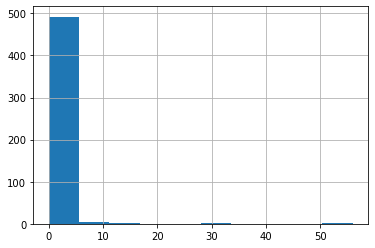

In [26]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count